In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
train = pd.read_csv('train.csv', index_col='PassengerId')

In [62]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


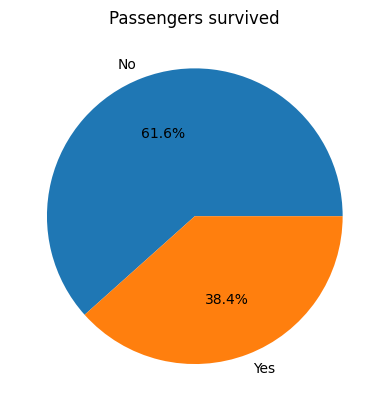

In [63]:
plt.pie(train['Survived'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Passengers survived')
plt.show()

In [64]:
print('Cols with percentage of missing data:')
train.isna().mean().sort_values(ascending=False).head(25) * 100

Cols with percentage of missing data:


Cabin       77.104377
Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
dtype: float64

In [65]:
print('Types of cols:')
train.dtypes.value_counts()

Types of cols:


object     5
int64      4
float64    2
dtype: int64

In [66]:
def prep_data(df):
  df = df.drop(columns=['Name', 'Cabin', 'Ticket'])

  df[['Fare']] = df[['Fare']].fillna(value=df['Fare'].mean())
  df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
  df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())
  df['Sex'] = df['Sex'] == 'male'

  ports = { 'Q': 0, 'C': 1, 'S': 2 }
  df['Embarked'] = df['Embarked'].apply(lambda x: ports[x])

  return pd.get_dummies(df)

In [67]:
train_prep = prep_data(train)

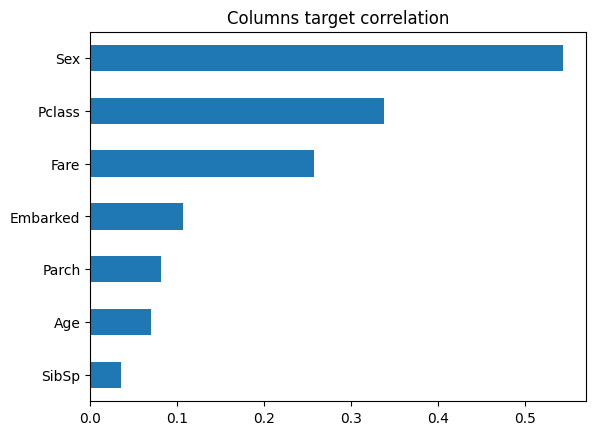

In [68]:
correlations = train_prep.corr(numeric_only=True)['Survived'].abs().sort_values()
correlations[-20:-1].plot(kind='barh')
plt.title('Columns target correlation')
plt.show()

In [69]:
train_prep

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,True,22.000000,1,0,7.2500,2
2,1,1,False,38.000000,1,0,71.2833,1
3,1,3,False,26.000000,0,0,7.9250,2
4,1,1,False,35.000000,1,0,53.1000,2
5,0,3,True,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,True,27.000000,0,0,13.0000,2
888,1,1,False,19.000000,0,0,30.0000,2
889,0,3,False,29.699118,1,2,23.4500,2


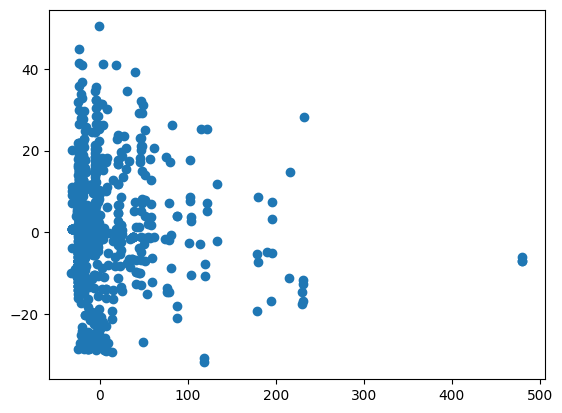

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df = pca.fit_transform(train_prep.drop(columns=['Survived']))

plt.scatter(df[:, 0], df[:, 1])
plt.show()

In [71]:
from sklearn.cluster import KMeans
 
def get_clusters(df, n_clusters):
  kmeans = KMeans(n_clusters, n_init='auto')
  
  labels = kmeans.fit_predict(df)
  
  return [df[labels == i] for i in range(n_clusters)], kmeans.cluster_centers_

In [72]:
def draw_clusters(clusters, centroids):
  for label, cluster in enumerate(clusters):
    plt.scatter(cluster[:,0] , cluster[:,1] , label=label)
  plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, color = 'black')

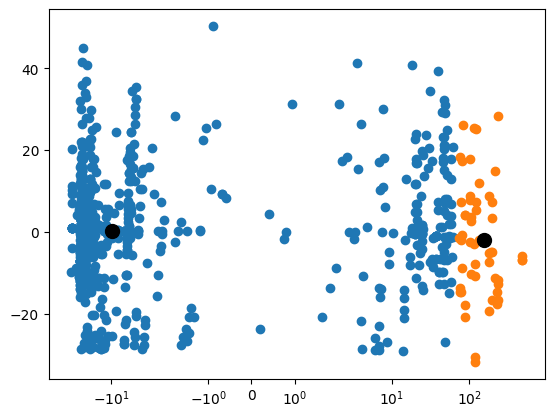

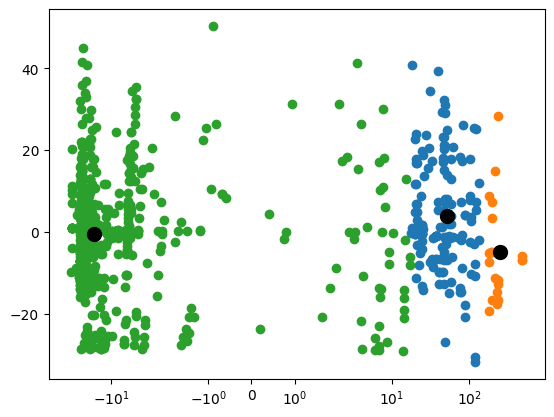

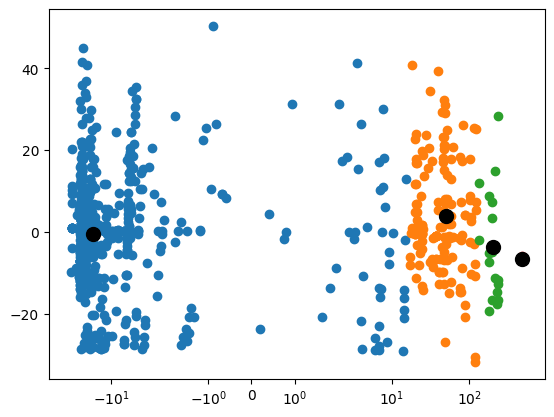

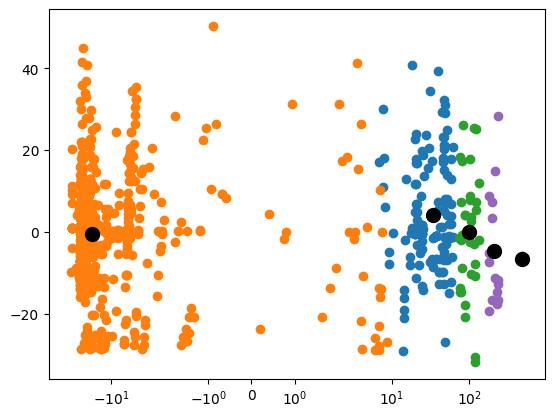

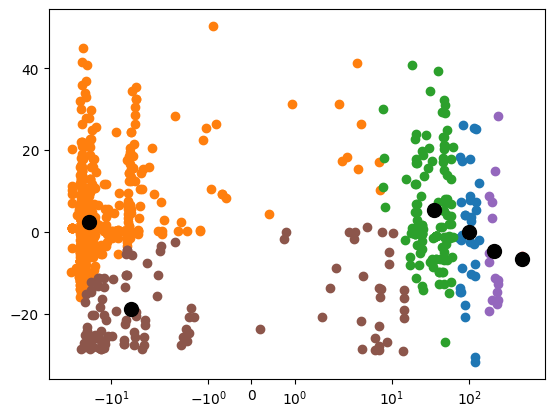

In [73]:
for i in range(2, 7):
  clusters, centroids = get_clusters(df, i)
  draw_clusters(clusters, centroids)

  plt.xscale('symlog')
  plt.show()

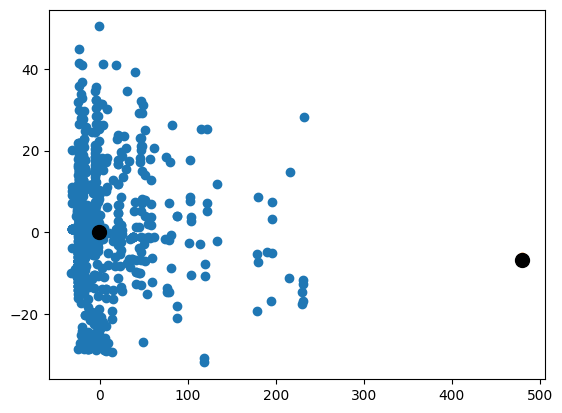

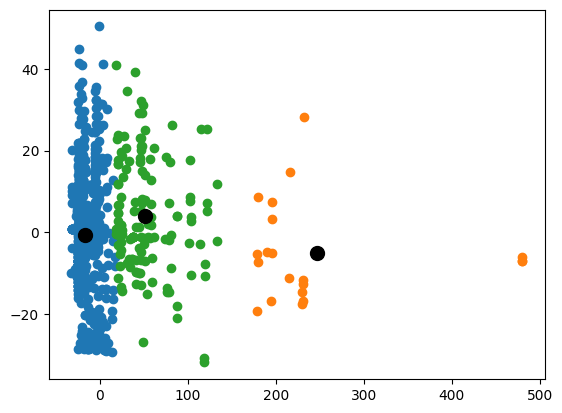

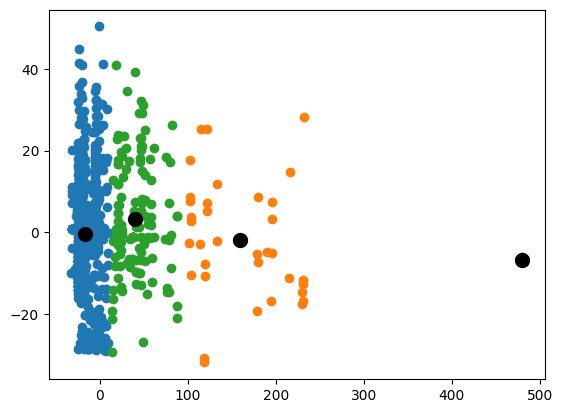

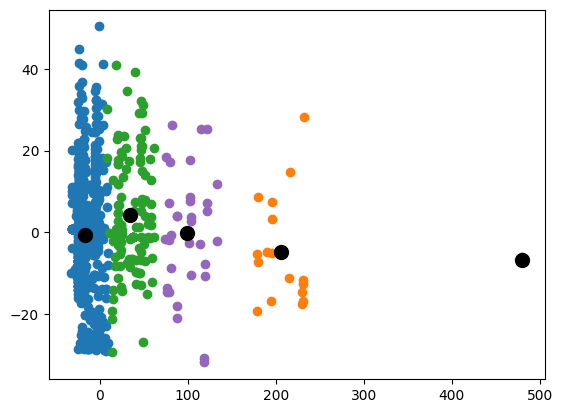

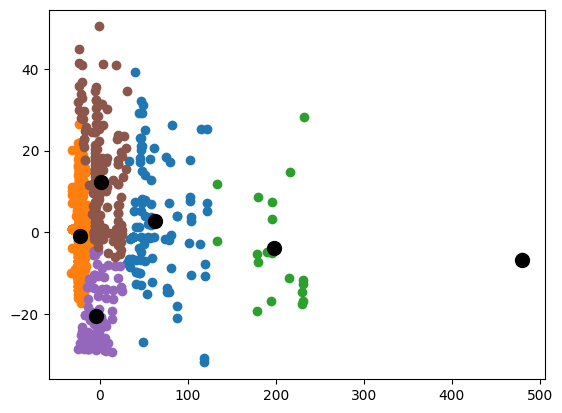

In [74]:
for i in range(2, 7):
  clusters, centroids = get_clusters(df, i)
  draw_clusters(clusters, centroids)

  plt.show()